In [1]:
## till now : 6 lectures ( 1hr 17 mins)

## In this update : 10 lectures ( 1hr 50 mins )

## Dataset : https://www.kaggle.com/datasets/snap/amazon-fine-food-reviews

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

##  warnings.simplefilter('ignore')

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

    The column or features in the dataset:
    
    Id
    ProductId — unique identifier for the product
    UserId — unqiue identifier for the user
    ProfileName - 
    HelpfulnessNumerator — number of users who found the review helpful
    
    HelpfulnessDenominator — number of users who indicated whether 
                             they found the review helpful or not
                             
    Score — rating between 1 and 5
    Time — timestamp for the review
    Summary — brief summary of the review
    Text — text of the review

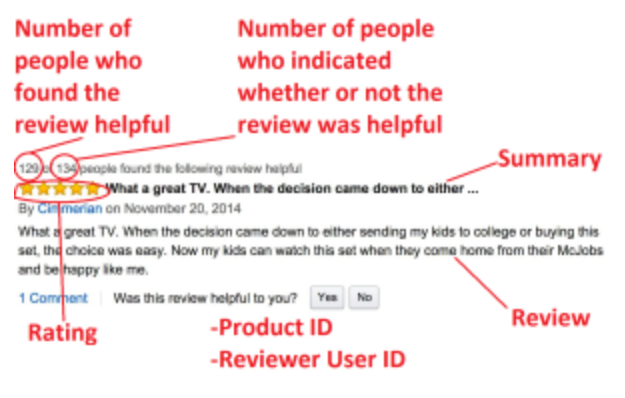

In [4]:
from IPython.display import Image
Image(filename=r'C:\Users\mcr\Pictures\Camera Roll/amazon.png') 

## 1.. reading data from Sqlite database

In [ ]:
### SQLite is an embedded, file-based RDBMS
### SQLite is an open-source relational database i.e. used to perform database operations on android devices 
### such as storing, manipulating or retrieving persistent data from the database. It is embedded in android bydefault

In [2]:
import sqlite3

In [4]:

# very first u have to create a SQL connection to our SQLite database

con = sqlite3.connect('G:\Data Science projects\By_me\ML\Amazon\Dataset
                      /database.sqlite')

In [5]:
type(con)

sqlite3.Connection

In [ ]:
#### check online its table name on https://sqliteonline.com/

#### reading data from Sqlite database

In [9]:
# pd.read_sql_query("SELECT * FROM Reviews", con)  ## takes 1 min 

In [6]:
df = pd.read_sql_query("SELECT * FROM Reviews", con) ## takes 1 min 

#### reading some n number of rows, use LIMIT over there

In [11]:
# pd.read_sql_query("SELECT * FROM Reviews LIMIT 3", con)

In [12]:
df.shape

(568454, 10)

## 2.. Data Preparation !
    Doing basic cleaning/Data wrangling(remove invalid rows , 
    remove duplicate rows ..) + convert time to date-time

In [13]:
'''

HelpfulnessDenominator is : people found useful count + people found 
                            not so useful count (ie how many people reviewed )
                            
Helpfulnessnumerator is among those how many found it helpful…..
                                consider it like a percentage….

So, from this we can see that HelfulnessNumerator is always less 
                                than or equal to HelpfulnesDenominator..

'''

'\n\nHelpfulnessDenominator is : people found useful count + people found not so useful count (ie how many people reviewed )\nHelpfulnessnumerator is among those how many found it helpful…..consider it like a percentage….\n\nSo, from this we can see that HelfulnessNumerator is always less than or equal to HelpfulnesDenominator..\n\n'

In [7]:
df[df['HelpfulnessNumerator'] > \
               df['HelpfulnessDenominator']]  ## invalid rows

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
44736,44737,B001EQ55RW,A2V0I904FH7ABY,Ram,3,2,4,1212883200,Pure cocoa taste with crunchy almonds inside,It was almost a 'love at first bite' - the per...
64421,64422,B000MIDROQ,A161DK06JJMCYF,"J. E. Stephens ""Jeanne""",3,1,5,1224892800,Bought This for My Son at College,My son loves spaghetti so I didn't hesitate or...


In [8]:
df_valid  = df[df['HelpfulnessNumerator'] <= \
               df['HelpfulnessDenominator']] ## valid rows 

In [9]:
df_valid .shape

(568452, 10)

#### lets find out whether instances/rows are duplicate or not !


    Deduplication means removing duplicate rows, It is necessary 
    to remove duplicates in order to get unbaised results,
    
    Checking duplicates based on UserId, ProfileName, Time, Text as 
    No user can type a review on same exact time for 
    different products, so we will remove those records
    

In [10]:
df_valid.duplicated(["UserId","ProfileName","Time","Text"])

0         False
1         False
2         False
3         False
4         False
          ...  
568449    False
568450    False
568451    False
568452    False
568453    False
Length: 568452, dtype: bool

In [11]:
df_valid[df_valid.duplicated(["UserId","ProfileName","Time","Text"])]

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
29,30,B0001PB9FY,A3HDKO7OW0QNK4,Canadian Fan,1,1,5,1107820800,The Best Hot Sauce in the World,I don't know if it's the cactus or the tequila...
574,575,B000G6RYNE,A3PJZ8TU8FDQ1K,Jared Castle,2,2,5,1231718400,"One bite and you'll become a ""chippoisseur""","I'm addicted to salty and tangy flavors, so wh..."
1973,1974,B0017165OG,A2EPNS38TTLZYN,tedebear,0,0,3,1312675200,Pok Chops,The pork chops from Omaha Steaks were very tas...
2309,2310,B0001VWE0M,AQM74O8Z4FMS0,Sunshine,0,0,2,1127606400,Below standard,Too much of the white pith on this orange peel...
2323,2324,B0001VWE0C,AQM74O8Z4FMS0,Sunshine,0,0,2,1127606400,Below standard,Too much of the white pith on this orange peel...
...,...,...,...,...,...,...,...,...,...,...
568409,568410,B0018CLWM4,A2PE0AGWV6OPL7,Dark Water Mermaid,3,3,5,1309651200,Quality & affordable food,I was very pleased with the ingredient quality...
568410,568411,B0018CLWM4,A88HLWDCU57WG,R28,2,2,5,1332979200,litter box,My main reason for the five star review has to...
568411,568412,B0018CLWM4,AUX1HSY8FX55S,DAW,1,1,5,1319500800,Happy Camper,I bought this to try on two registered Maine C...
568412,568413,B0018CLWM4,AVZ2OZ479Q9E8,Ai Ling Chow,0,0,5,1336435200,Two Siberians like it!,When we brought home two 3-month-old purebred ...


In [19]:
'''
keep='first' (default): mark / drop duplicates except for the 
                        first occurrence.

keep='last': mark / drop duplicates except for the last occurrence.

keep=False: mark / drop all duplicates.

'''

"\nkeep='first' (default): mark / drop duplicates except for the first occurrence.\n\nkeep='last': mark / drop duplicates except for the last occurrence.\n\nkeep=False: mark / drop all duplicates.\n\n"

In [20]:
### ie , approx 174521 are duplicated ..

In [12]:
data = df_valid.drop_duplicates(subset={"UserId","ProfileName",\
                            "Time","Text"}) ## takes 30-40 sec 

In [13]:
data.shape

(393931, 10)

#### Time — timestamp for the review
    convert time to date-time !

In [15]:
data['Time']

0         1303862400
1         1346976000
2         1219017600
3         1307923200
4         1350777600
             ...    
568449    1299628800
568450    1331251200
568451    1329782400
568452    1331596800
568453    1338422400
Name: Time, Length: 393931, dtype: int64

In [16]:
pd.to_datetime(data['Time']) 
### not giving right results , lets customize "unit" parameter 

### as default is : unix start time "1970-01-01"

### 00:00:01.303862400 ->> by-default this time is in "nano-second" 
## as default value of unit = "ns"

0        1970-01-01 00:00:01.303862400
1        1970-01-01 00:00:01.346976000
2        1970-01-01 00:00:01.219017600
3        1970-01-01 00:00:01.307923200
4        1970-01-01 00:00:01.350777600
                      ...             
568449   1970-01-01 00:00:01.299628800
568450   1970-01-01 00:00:01.331251200
568451   1970-01-01 00:00:01.329782400
568452   1970-01-01 00:00:01.331596800
568453   1970-01-01 00:00:01.338422400
Name: Time, Length: 393931, dtype: datetime64[ns]

In [18]:
pd.to_datetime(data['Time'], unit='s')

0        2011-04-27
1        2012-09-07
2        2008-08-18
3        2011-06-13
4        2012-10-21
            ...    
568449   2011-03-09
568450   2012-03-09
568451   2012-02-21
568452   2012-03-13
568453   2012-05-31
Name: Time, Length: 393931, dtype: datetime64[ns]

In [19]:
data['Time'] = pd.to_datetime(data['Time'], unit='s')

In [20]:
data['Time']

0        2011-04-27
1        2012-09-07
2        2008-08-18
3        2011-06-13
4        2012-10-21
            ...    
568449   2011-03-09
568450   2012-03-09
568451   2012-02-21
568452   2012-03-13
568453   2012-05-31
Name: Time, Length: 393931, dtype: datetime64[ns]

In [21]:
data.head(2)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,2011-04-27,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,2012-09-07,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...


In [22]:
data.dtypes

Id                                 int64
ProductId                         object
UserId                            object
ProfileName                       object
HelpfulnessNumerator               int64
HelpfulnessDenominator             int64
Score                              int64
Time                      datetime64[ns]
Summary                           object
Text                              object
dtype: object

## 3.. Analyse to what User Amazon Can recommend more product ? 

In [ ]:
'''
Amazon can recommend more products to only those who are going to buy 
more or to one who has a better conversion rate,so lets ready 
data according to this problem statement

'''

In [23]:
data.shape

(393931, 10)

In [25]:
data['ProfileName'].nunique()

## ie total users are 256059

### ie Profile_Name could be same but User-ID will be different , 
## so lets consider User-ID for this analysis..

218418

In [24]:
data['UserId'].nunique()

## ie total users are 256059

256059

In [34]:
data.head(2)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,27-04-11 05:30:00,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,07-09-12 05:30:00,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...


In [ ]:
data.groupby(['UserId']).agg({'Summary':'count', 'Text':'count',\
                              'Score':'mean','ProductId':'count'})

### 'Number_of_summaries','number_of_text','Avg_score',
## 'Number_of_products_purchased'

In [36]:
recommend_df = data.groupby(['UserId']).agg({'Summary':'count', \
                 'Text':'count','Score':'mean','ProductId':'count'})
                    .sort_values(by='ProductId',ascending=False)
recommend_df

,Summary,Text,Score,ProductId
UserId,,,,
AY12DBB0U420B,329,329,4.659574,329
A3OXHLG6DIBRW8,278,278,4.546763,278
A281NPSIMI1C2R,259,259,4.787645,259
A1YUL9PCJR3JTY,214,214,4.621495,214
A1Z54EM24Y40LL,211,211,4.383886,211
...,...,...,...,...
A2E80MDB9TCNGW,1,1,3.000000,1
A2E80RT3HOR35T,1,1,5.000000,1
A2E816C5N51F6X,1,1,5.000000,1


In [37]:
recommend_df.columns=['Number_of_summaries','num_text','Avg_score',\
                        'Number_of_products_purchased']
recommend_df

,Number_of_summaries,num_text,Avg_score,Number_of_products_purchased
UserId,,,,
AY12DBB0U420B,329,329,4.659574,329
A3OXHLG6DIBRW8,278,278,4.546763,278
A281NPSIMI1C2R,259,259,4.787645,259
A1YUL9PCJR3JTY,214,214,4.621495,214
A1Z54EM24Y40LL,211,211,4.383886,211
...,...,...,...,...
A2E80MDB9TCNGW,1,1,3.000000,1
A2E80RT3HOR35T,1,1,5.000000,1
A2E816C5N51F6X,1,1,5.000000,1


In [38]:
### lets find Top 10 users ! 

In [39]:
user_10 = recommend_df.index[0:10]
number_10 = recommend_df['Number_of_products_purchased'][0:10]


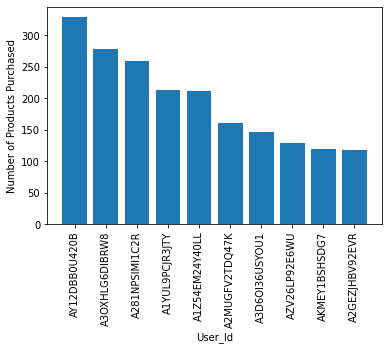

In [40]:
plt.bar(user_10, number_10)
plt.xlabel('User_Id')
plt.ylabel('Number of Products Purchased')
plt.xticks(rotation='vertical')
plt.show()

#### These are the Top 10 Users so we can recommend more & more Products
#### to these Usser Id as there will be a high probability that these person are going to be buy more

## 4.. which product has good number of reviews ? 

In [41]:
data.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [42]:
data['ProductId'].unique()

array(['B001E4KFG0', 'B00813GRG4', 'B000LQOCH0', ..., 'B003S1WTCU',
       'B004I613EE', 'B001LR2CU2'], dtype=object)

In [43]:
len(data['ProductId'].unique())

## We can see that there are 67624 types of products in the dataset.

67624

In [44]:
### so first filter out data & lets set a condition as ,a product 
## must be sold atleast 600 times..

In [45]:
## how u can come up with a idea that threshold value is 500..
## again it depends upon data behaviour & typically domain expertise
## suggest u what can be the best value..

# data.groupby('ProductId').filter(lambda x: len(x) >= 500)

In [46]:
data['ProductId'].value_counts()

B007JFMH8M    912
B002QWP89S    630
B003B3OOPA    622
B001EO5Q64    566
B0013NUGDE    558
             ... 
B007IW3MLM      1
B001GLKCSM      1
B0006L7Y1G      1
B002WTN4QO      1
B0012BPV64      1
Name: ProductId, Length: 67624, dtype: int64

In [47]:
prod_count = data['ProductId'].value_counts().to_frame()
prod_count

,ProductId
B007JFMH8M,912
B002QWP89S,630
B003B3OOPA,622
B001EO5Q64,566
B0013NUGDE,558
...,...
B007IW3MLM,1
B001GLKCSM,1
B0006L7Y1G,1
B002WTN4QO,1


In [48]:
fre_prod_ids = prod_count[prod_count['ProductId']>500].index

In [49]:
fre_prod_ids

Index(['B007JFMH8M', 'B002QWP89S', 'B003B3OOPA', 'B001EO5Q64', 'B0013NUGDE',
       'B000KV61FC', 'B000UBD88A', 'B000NMJWZO', 'B005K4Q37A', 'B0090X8IPM',
       'B005ZBZLT4'],
      dtype='object')

In [50]:
fre_prod_df = data[data['ProductId'].isin(fre_prod_ids)] ## take 10 sec

In [51]:
fre_prod_df.head(2)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
20982,20983,B002QWP89S,A21U4DR8M6I9QN,"K. M Merrill ""justine""",1,1,5,18-10-11 05:30:00,addictive! but works for night coughing in dogs,my 12 year old sheltie has chronic brochotitis...
20983,20984,B002QWP89S,A17TDUBB4Z1PEC,jaded_green,1,1,5,14-10-11 05:30:00,genuine Greenies best price,"These are genuine Greenies product, not a knoc..."


<AxesSubplot:xlabel='count', ylabel='ProductId'>

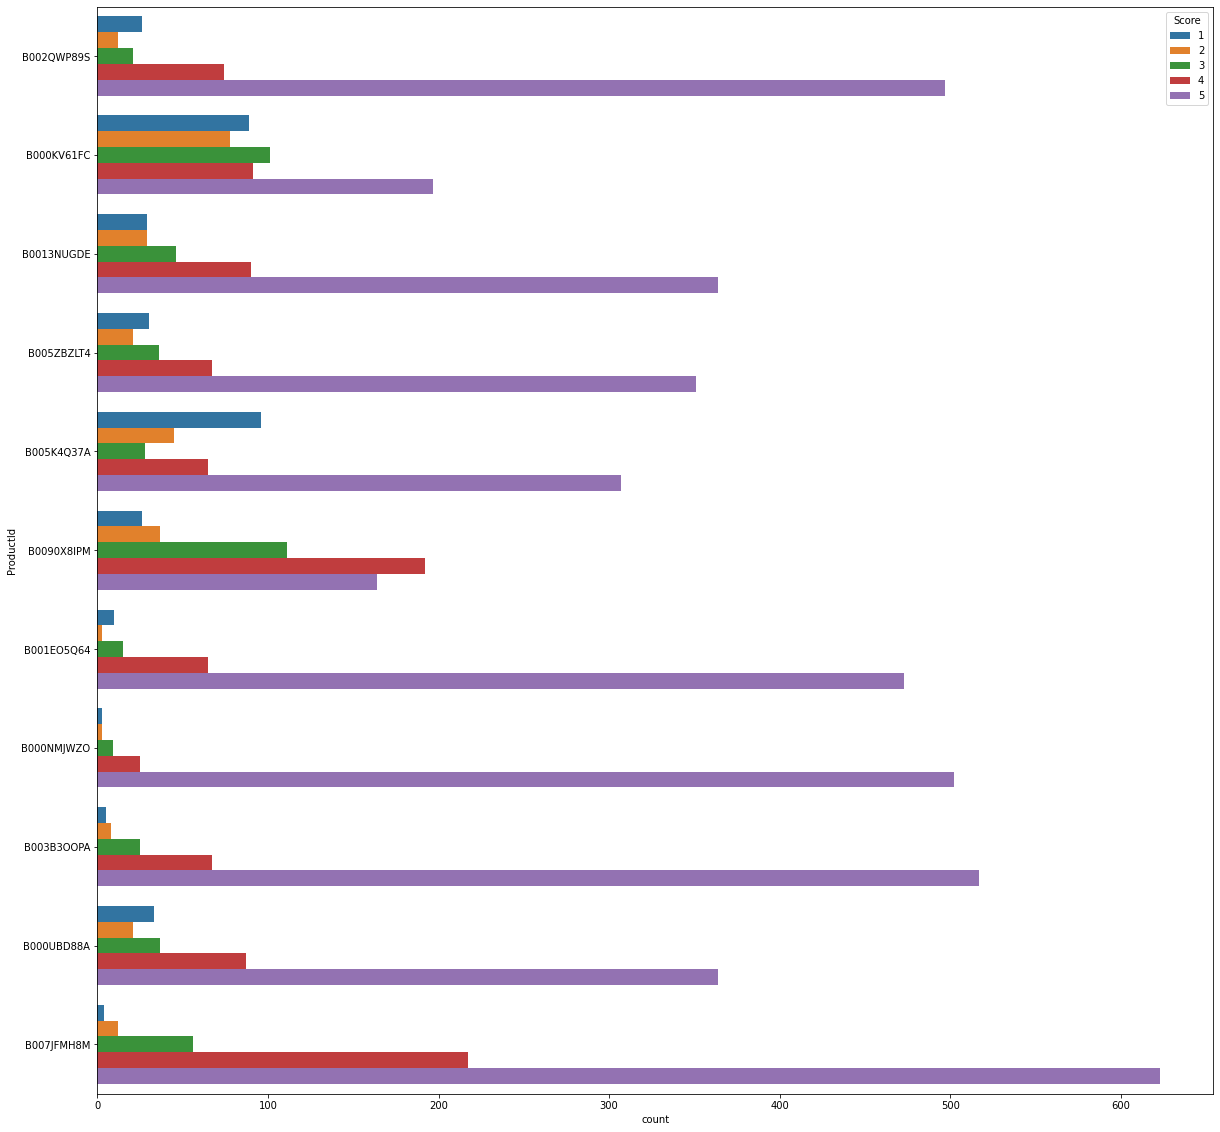

In [52]:
plt.figure(figsize=(20,20))
import seaborn as sns
sns.countplot(y="ProductId",  hue="Score", data= fre_prod_df)

## 5.. is there any difference between behaviour of frequent viewers & not frequent viewers ?

In [53]:
'''

First lets understand who are frequent viewers & who are not 
frequent viewers ..

Frequent viewers are those who have bought products atleast 
50 times or more ..
Non-Frequent viewers are those who have bought products less 
than 50 times 


'''

'\n\nFirst lets understand who are frequent viewers & who are not frequent viewers ..\n\nFrequent viewers are those who have bought products atleast 50 times or more ..\nNon-Frequent viewers are those who have bought products less than 50 times \n\n\n'

In [54]:
x = data['UserId'].value_counts()

In [55]:
x.to_dict()

{'AY12DBB0U420B': 329,
 'A3OXHLG6DIBRW8': 278,
 'A281NPSIMI1C2R': 259,
 'A1YUL9PCJR3JTY': 214,
 'A1Z54EM24Y40LL': 211,
 'A2MUGFV2TDQ47K': 161,
 'A3D6OI36USYOU1': 146,
 'AZV26LP92E6WU': 129,
 'AKMEY1BSHSDG7': 119,
 'A2GEZJHBV92EVR': 118,
 'A1IU7S4HCK1XK0': 112,
 'A33AQPJYH7UUXR': 110,
 'A1WX42M589VAMQ': 109,
 'A3F3B1JPACN215': 108,
 'AY1EF0GOH80EK': 107,
 'A2DPYMNI2HCIOI': 107,
 'A2Y8IDC1FKGNJC': 105,
 'A2R6RA8FRBS608': 103,
 'AQQLWCMRNDFGI': 99,
 'A36WGHR8TO5DKT': 98,
 'A31N6KB160O508': 97,
 'A25C2M3QF9G7OQ': 95,
 'A3HPCRD9RX351S': 94,
 'A2XNOB1T796Y6B': 94,
 'ALSAOZ1V546VT': 93,
 'AEC90GPFKLAAW': 93,
 'A1LZJZIHUPLDV4': 92,
 'A2M9D9BDHONV3Y': 92,
 'AQLL2R1PPR46X': 91,
 'A2PNOU7NXB1JE4': 91,
 'A1ZH9LWMX5UCFJ': 88,
 'A2E3WMF9RWW2X2': 87,
 'A3RR2P5IS3DGPR': 87,
 'A1HRYC60VTMYC0': 86,
 'A2FRFAQCWZJT3Q': 86,
 'A36MP37DITBU6F': 85,
 'A1Z4LX3Q1YMF84': 84,
 'A29313797NGT9L': 83,
 'A2C9XE9I8RSKNX': 81,
 'A3QNQQKJTL76H0': 79,
 'A2A1XYSB692L6J': 79,
 'A3EBHHCZO6V2A4': 79,
 'A1K82R24ROO2I7': 78,
 

In [56]:
data["viewer_type"] = data["UserId"].apply(lambda user: \
               "Frequent" if x[user]>50 else "Not Frequent" )

In [57]:
data.head(2)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,viewer_type
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,27-04-11 05:30:00,Good Quality Dog Food,I have bought several of the Vitality canned d...,Not Frequent
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,07-09-12 05:30:00,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,Not Frequent


In [58]:
data['viewer_type'].unique()

array(['Not Frequent', 'Frequent'], dtype=object)

In [59]:
freq_df = data[data['viewer_type']=="Frequent"]
not_freq_df = data[data['viewer_type']=="Not Frequent"]

In [60]:
freq_df['Score'].value_counts()/len(freq_df)*100

5    61.605044
4    21.147681
3     9.585381
2     3.932464
1     3.729429
Name: Score, dtype: float64

In [61]:
not_freq_df['Score'].value_counts()/len(not_freq_df)*100

5    63.757986
4    14.071191
1     9.349850
3     7.507547
2     5.313426
Name: Score, dtype: float64

Text(0.5, 1.0, 'Not Frequent users(1-49) Distribution')

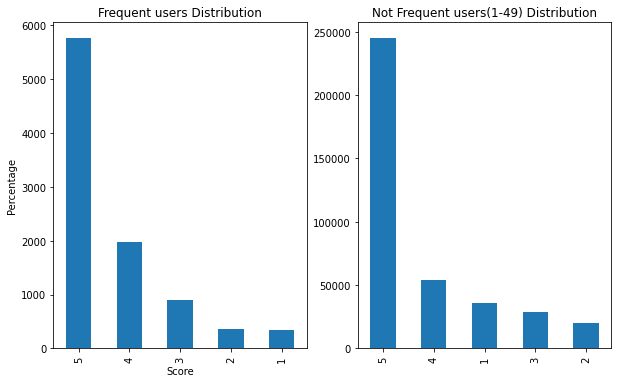

In [62]:

plt.figure(figsize=(10,6))

plt.subplot(1,2,1)
freq_df['Score'].value_counts().plot(kind='bar')
plt.xlabel("Score")
plt.ylabel("Percentage")
plt.title("Frequent users Distribution")

plt.subplot(1,2,2)
not_freq_df['Score'].value_counts().plot(kind='bar')
plt.title("Not Frequent users(1-49) Distribution")


In [63]:
'''
The distribution of ratings among frequent reviewers is similar to 
that of all reviews..

However, we can see that frequent reviewers give less 5-star reviews 
and less 1-star review..

Frequent users appear to be more discerning in the sense that 
they give less extreme reviews than infrequent reviews.

'''

'\nThe distribution of ratings among frequent reviewers is similar to that of all reviews. \nHowever, we can see that frequent reviewers give less 5-star reviews and less 1-star review.\nFrequent users appear to be more discerning in the sense that they give less extreme reviews than infrequent reviews.\n\n'

## 6.. Are frequent users more verbose ?  (ie someone who speaks or post alot ?

In [64]:
data['Text'][0]

'I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.'

In [65]:
len(data['Text'][0].split(' '))

### we can call split on string data to convert into 
## list based on Separator that I will pass 

49

In [66]:
def calculate_length(text):
    return len(text.split(' '))

In [67]:
data['Text_length'] = data['Text'].apply(calculate_length) 
## takes approx 40 sec

## data['Text'].str.split(' ').str.len() takes alot time

In [68]:
freq_data = data[data['viewer_type']=="Frequent"]
not_freq_data = data[data['viewer_type']=="Not Frequent"]

In [69]:
### since in the last prblm st , we have done using plt.subplot()
## so this time ,, let me show u how to create subplots using fig.add_subplot(121)

In [1]:
'''

The work that can be done using plt.subplots() can also be 
done using plt.subplot() & fig.add_subplot()


plt.subplots(3,2): This will directly Create a figure and a set of 
                    subplots & we can map our plot as per 
                    our need on subplots


plt.subplot(3,2,1): This works on the basis of indexing.. 
                    ie each & every subplot have some kind of index
                    This will directly Create a grid or matrices 
                    of 3*2 1 k is the index of the subplot on which 
                    we are on !
                    
fig.add_subplot() : First we define figure using plt.figure() 
                    & then we will plot axes or subplots on 
                    top of this figure


'''

'\n\nThe work that can be done using plt.subplots() can also be \ndone using plt.subplot() & fig.add_subplot()\n\n\nplt.subplots(3,2): This will directly Create a figure and a set of \nsubplots & we can map our plot as per our need on subplots\n\n\nplt.subplot(3,2,1): This works on the basis of indexing.. \n                    ie each & every subplot have some kind of index\n                    This will directly Create a grid or matrices of 3*2 1 k is the index of the subplot on which we are on !\n                    \nfig.add_subplot() : First we define figure using plt.figure() & then we will plot axes or subplots on top of this figure\n\n\n'

In [71]:
'''

Q .. when to use what ?
Ans .. Its upto u  , if subplot() is taking less lines of 
        code & it is more readable ,just go with it..


'''

'\n\nQ .. when to use what ?\nAns .. Its upto u  , if subplot() is taking less lines of code & it is more readable ,just go with it..\n\n\n'

Text(0.5, 0.98, 'Box-plot of review feature for both customers (frequent & non-frequent)')

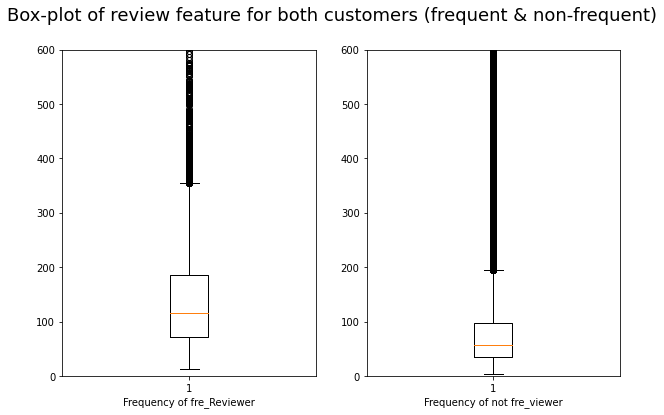

In [72]:
#define figure
fig = plt.figure(figsize=(10,6))

#add subplots
ax1 = fig.add_subplot(121)
ax1.boxplot(freq_data['Text_length'])
ax1.set_xlabel('Frequency of fre_Reviewer')
ax1.set_ylim(0, 600)


ax2 = fig.add_subplot(122)
ax2.boxplot(not_freq_data['Text_length'])
ax2.set_xlabel('Frequency of not fre_viewer')
ax2.set_ylim(0, 600)

plt.suptitle('Box-plot of review feature for both customers\
                (frequent & non-frequent)' , fontsize=18)

## we can also do this using plt.subplot()/plt.subplots as well.. 

In [73]:
'''

boxplot basically gives us 25th percentile , 50th percentile(median) , 
75th percentile & whiskers 
whiskers may be defined in different ways in different tools & packages..

sometimes it shows 99th percentile & 1 percentile value for different package 
sometimes it shows min & max value for different package  ..


'''

'\n\n boxplot basically gives us 25th percentile , 50th percentile(median) , 75th percentile & whiskers \n whiskers may be defined in different ways in different tools & packages..\n\nsometimes it shows 99th percentile & 1 percentile value for different package \nsometimes it shows min & max value for different package  ..\n\n\n'

In [74]:
'''
Conclusion : 

The distributions of word counts for frequent and infrequent reviews 
shows that : infrequent reviewers have a large amount of reviews 
of low word count..  On the other hand, the largest concentration of 
word count is higher for frequent reviewers than for infrequent reviews. 



'''

'\nConclusion : \n\nThe distributions of word counts for frequent and infrequent reviews shows that \ninfrequent reviewers have a large amount of reviews of low word count.\nOn the other hand, the largest concentration of word count is higher for frequent reviewers than for infrequent reviews. \n\n\n\n'

In [75]:
'''

## violinplot =  PDF(density/distribution) + boxplot 

'''

'\n## violinplot =  PDF(density/distribution) + boxplot \n\n'

Text(0.5, 0.98, 'Box-plot of review feature for both customers (frequent & non-frequent)')

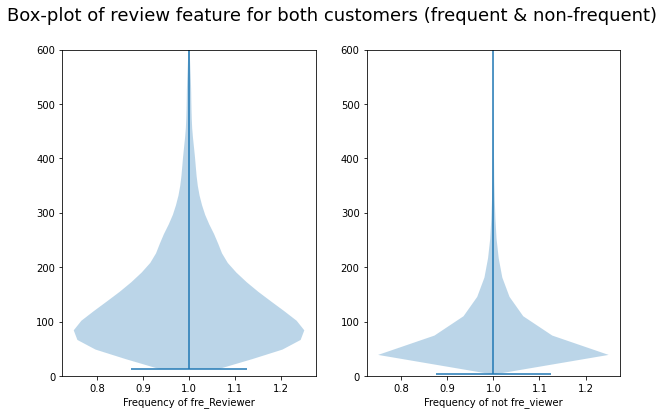

In [76]:
#define figure
fig = plt.figure(figsize=(10,6))

#add subplots
ax1 = fig.add_subplot(121)
ax1.violinplot(freq_data['Text_length'])
ax1.set_xlabel('Frequency of fre_Reviewer')
ax1.set_ylim(0, 600)


ax2 = fig.add_subplot(122)
ax2.violinplot(not_freq_data['Text_length'])
ax2.set_xlabel('Frequency of not fre_viewer')
ax2.set_ylim(0, 600)

plt.suptitle('Box-plot of review feature for both customers \
                    (frequent & non-frequent)' , fontsize=18)

## we can also do this using plt.subplot()/plt.subplots as well.. 

## 7.. sentiment analysis ! 

#### What is sentiment analysis?
    Sentiment analysis is the computational task of automatically determining 
    what feelings a writer is expressing in text
    Some examples of applications for sentiment analysis include:

    1. Analyzing the social media discussion around a certain topic
    2. Evaluating survey responses
    3. Determining whether product reviews are positive or negative

    Sentiment analysis is not perfect.It also cannot tell you why a writer 
    is feeling a certain way. However, it can be 
    useful to quickly summarize some qualities of text, especially if you 
    have so much text that a human reader cannot analyze it. 
    For this project,the goal is to to classify Food reviews based on customers' text.

In [77]:
from textblob import TextBlob

In [78]:
data['Summary'][0]

'Good Quality Dog Food'

In [79]:
TextBlob(data['Summary'][0]).sentiment.polarity

0.7

In [80]:
sample = data[0:50000]

### if u do not have good specifications , 
## then its good to consider sample of data ..

In [81]:
## takes 3 mins for whole data
## For sample , it might take 30 sec 

polarity = [] # list which will contain the polarity of the comments

for text in sample['Summary']:
    try:
        polarity.append(TextBlob(text).sentiment.polarity)   
    except:
        polarity.append(0)

In [82]:
len(polarity)

50000

In [83]:
sample['polarity'] = polarity

In [84]:
sample_negative = sample[sample['polarity']<0]
sample_positive = sample[sample['polarity']>0]


In [85]:
sample_negative.shape

(4659, 13)

In [86]:
sample_positive.shape

(29155, 13)

In [87]:
from collections import Counter

In [88]:
Counter(sample_positive['Summary']).most_common(10)

[('Delicious!', 208),
 ('Delicious', 204),
 ('Great product', 100),
 ('Excellent', 85),
 ('Love it!', 81),
 ('Great', 81),
 ('Great Product', 77),
 ('Great!', 70),
 ('Good stuff', 51),
 ('Awesome', 50)]

In [89]:
Counter(sample_negative['Summary']).most_common(10)

[('Disappointed', 44),
 ('Disappointing', 32),
 ('Bland', 18),
 ('Awful', 17),
 ('Not what I expected', 17),
 ('Terrible', 15),
 ('Horrible', 15),
 ('disappointed', 15),
 ('Disgusting', 12),
 ('not good', 11)]

## 8.. Doing text cleaning !
       removal of urls , punctuations etc 
       
       
       Imagine we need to find what are those key-words
       (Amazing , awesome , bad , disgusting) 
       
       ->> or pair of 2 words eg (nice coffee , affordable gadget , 
           best phone , green tea , dark choclate) 
           
       ->> or pair of 3 words eg 
           (highly recommended item , most expensive TV) 
       
       that are being extremely used by Users of Amazon while 
       posting comment for Amazon product they bought , 
       so that we are able to understand intent or behaviour of Customers..
       
       But first & foremost we need to clean Text feature !
       

### Steps to pre-process/Clean Text feature :-->> 
    a.. applying Lower-case operation on data !
    b.. removal of hyperlinks from data
    c.. dealing with contractions (if available)
    d.. removing special characters from data or punctuations from data
    
    e.. removal of stopwords

#### a.. applying Lower-case operation on data !

In [90]:
sample['Text'][1]

'Product arrived labeled as Jumbo Salted Peanuts...the peanuts were actually small sized unsalted. Not sure if this was an error or if the vendor intended to represent the product as "Jumbo".'

In [91]:
### there will be some reviews written by user in which they have 
## used lower-case "jumbo" instead of Title-case "Jumbo"..
### but technically both are same , so lets make both on same scale ..

In [92]:
sample['Text'] = sample['Text'].str.lower()

In [93]:
sample['Text'][1]

'product arrived labeled as jumbo salted peanuts...the peanuts were actually small sized unsalted. not sure if this was an error or if the vendor intended to represent the product as "jumbo".'

In [94]:
sample.head(2)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,viewer_type,Text_length,polarity
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,27-04-11 05:30:00,Good Quality Dog Food,i have bought several of the vitality canned d...,Not Frequent,49,0.7
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,07-09-12 05:30:00,Not as Advertised,product arrived labeled as jumbo salted peanut...,Not Frequent,31,0.0


#### b.. removal of hyperlinks from data

#### lets check how many rows have 'hyperlinks' ..
     A Hyperlink could have href , https , https , www or anchor tag..
     
     anchor tag : <a href="http://www....   </a>

In [95]:
sample['Text'].str.contains('http').sum()

1024

In [96]:
sample['Text'].str.contains('https').sum()

0

In [97]:
sample['Text'].str.contains('www').sum()

1051

In [98]:
sample['Text'].str.contains('href').sum()

984

In [99]:
pattern = r'<a.*?>'
sample['Text'].str.contains(pattern).sum()

984

In [100]:
sample['Text'].str.contains('http|www|href|https|<a.*?</a>').sum()

### ie there are total 1053 rows which have hyperlinks ..

1053

In [101]:
'''

we have observed as we have 1053 rows which have URLs or 
have https|http that is definitely a kind of Dirtines in data, 
so we have to clean this data & make it ready data for 
the analysis & Modelling ..

'''

'\n\nwe have observed as we have 1053 rows which have URLs or have https|http that is definitely a kind of Dirtines in data, \nso we have to clean this data & make it ready data for the analysis & Modelling ..\n\n'

In [102]:
sample[sample['Text'].str.contains('http|www|href|https|<a.*?</a>' ,\
                                   regex=True )]

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,viewer_type,Text_length,polarity
21,22,B001GVISJM,AZOF9E17RGZH8,Tammy Anderson,0,0,5,25-06-11 05:30:00,TWIZZLERS,i bought these for my husband who is currently...,Not Frequent,45,0.000000
25,26,B001GVISJM,A3FONPR03H3PJS,"Deborah S. Linzer ""Cat Lady""",0,0,5,29-10-10 05:30:00,Twizzlers - Strawberry,product received is as advertised.<br /><br />...,Not Frequent,14,0.000000
39,40,B001EO5QW8,AO80AC8313NIZ,kYpondman,0,0,5,28-09-11 05:30:00,Wife's favorite Breakfast,i ordered this for my wife as it was reccomend...,Not Frequent,51,0.500000
348,349,B00067AD4U,A3GT3KCGY9EYF4,Siri J,1,1,5,21-12-07 05:30:00,Good stuff!,"""these are delicious! the chocolate is excelle...",Not Frequent,28,0.875000
369,370,B002O3VHXU,A3OXHLG6DIBRW8,"C. F. Hill ""CFH""",1,1,5,19-08-10 05:30:00,Very Smooth Coffee - Highly Recommended,"green mountain ""nantucket blend"" k-cups make a...",Frequent,75,0.340000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
54071,54072,B000NA9ODG,A2B8GXSCB1R05T,Zack Davisson,1,1,1,15-01-12 05:30:00,Even if you like curry ...,"this is apparently falling into that ""love it ...",Not Frequent,143,0.000000
54205,54206,B00434HK84,A1ZH9LWMX5UCFJ,"K. Stuckey ""kateling""",2,2,5,02-02-11 05:30:00,great low-cal option!,chock full of vegetables and very zesty! i end...,Frequent,70,1.000000
54228,54229,B000I66WQW,AY31MBV3CQEG1,Mark,0,0,4,14-01-11 05:30:00,"Very Nice, best green tea I've tasted so far",this is the best-tasting out of the 5-6 green ...,Not Frequent,45,0.420000
54229,54230,B001H0FI22,A18SPWHKMN5P86,"E. polus ""e.p.""",43,44,5,29-09-10 05:30:00,"Easy, quick, and great tasting capsules","i bought the dolce gusto machine in 2008, and ...",Not Frequent,897,0.522222


In [103]:
sample['Text'][21]

'i bought these for my husband who is currently overseas. he loves these, and apparently his staff likes them also.<br />there are generous amounts of twizzlers in each 16-ounce bag, and this was well worth the price. <a href="http://www.amazon.com/gp/product/b001gvisjm">twizzlers, strawberry, 16-ounce bags (pack of 6)</a>'

In [104]:
import re

In [105]:
### ie after http , whatever we have except than space,tab,newline  , 
## just remove it .

re.sub(r"http\S+", "", sample['Text'][21] )

### Not much better bcz here we have anchor tag as well , 
## so lets define pattern for anchor tag as well ..

'i bought these for my husband who is currently overseas. he loves these, and apparently his staff likes them also.<br />there are generous amounts of twizzlers in each 16-ounce bag, and this was well worth the price. <a href=" strawberry, 16-ounce bags (pack of 6)</a>'


     A Hyperlink could have href , https , https , www or anchor tag..
     
     anchor tag : <a href="http://www....   </a>

In [106]:
### so lets define a pattern that can hold all these pattern ...

##### HTML tag 
    <--opening of HTML tags
    >-Closing of html tags
    
    <.*?> -- inside HTML tags , we can have any number of characters..

    >>   .-any char except new line
    >>   *- 0 or more occurences
    >>   ?(Quantifier)-0 or 1
    
     use of ? quantifier->> either it is present or absent 
     (as we can have both the scenarios in data )
        Scenario 1:<a href="http://www.amazon.com>
        Scenario 2:<a >
            
        Thats why we have to use this '?' quantifier 
        to handle both the scenario..

In [107]:
re.sub(r"http\S+|https\S+|www\S+|href\S+|<a.*?</a>", "", \
       sample['Text'][21] )

'i bought these for my husband who is currently overseas. he loves these, and apparently his staff likes them also.<br />there are generous amounts of twizzlers in each 16-ounce bag, and this was well worth the price. '

In [108]:
def remove_hyperlinks(text):
    return re.sub(r"http\S+|https\S+|www\S+|href\S+|<a.*?</a>", \
                  "", text)

In [109]:
sample['Text'] = sample['Text'].apply(remove_hyperlinks) ## takes 10 sec 

## 9.. Doing more cleaning !  
      Working with Contractions , Punctuations , removal of Stopwords !

#### c.. dealing with contractions (if available)

In [110]:
#### since we remove URLs , lets fix some other problems : ,
## lets talk about Contractions in English lang..

### The English language has a couple of contractions. For instance:

    you've -> you have
    he's -> he is
    
    These can sometimes cause headache when you are doing 
    natural language processing.
    
    As there are lots of contractions , so lets try to talk with 
    respect to most used contractions

#### For contractions
https://stackoverflow.com/a/47091490/4084039 

In [111]:
sample['Text'][1]

'product arrived labeled as jumbo salted peanuts...the peanuts were actually small sized unsalted. not sure if this was an error or if the vendor intended to represent the product as "jumbo".'

In [112]:
sample['Text'].str.contains("\'ll").sum()

2634

In [113]:
sample['Text'].str.contains("won't").sum()

1498

In [114]:
sample['Text'].str.contains("can\'t").sum()

3042

In [ ]:
# !pip install contractions

In [115]:
import contractions

In [116]:
print(contractions.fix("you've"))
print(contractions.fix("he's"))

you have
he is


In [117]:
sample['Text'] = sample['Text'].apply(lambda x : \
                              contractions.fix(x)) ## takes 5-10 sec

In [118]:
sample['Text'][0]

'i have bought several of the vitality canned dog food products and have found them all to be of good quality. the product looks more like a stew than a processed meat and it smells better. my labrador is finicky and she appreciates this product better than  most.'

In [119]:
sample['Text'].str.contains("\'ll").sum()

4

In [120]:
sample['Text'].str.contains("won't").sum()

0

In [121]:
sample['Text'].str.contains("can\'t").sum()

0

#### d.. removing special characters from data or punctuations from data

In [208]:
sample['Text'][1]

### having punc as "..." , "" , .

'product arrived labeled as jumbo salted peanuts...the peanuts were actually small sized unsalted. not sure if this was an error or if the vendor intended to represent the product as "jumbo".'

In [209]:
import string

In [210]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [211]:

def remove_punc(text):
    punctuations = string.punctuation
    # remove punctuation from the string
    no_punct = ""
    for char in text:
        if char not in punctuations:
            no_punct = no_punct + char
    return no_punct

In [212]:
sample['Text'] = sample['Text'].apply(remove_punc) ## takes approx 20 sec 

In [213]:
sample['Text'][1]

'product arrived labeled as jumbo salted peanutsthe peanuts were actually small sized unsalted not sure if this was an error or if the vendor intended to represent the product as jumbo'

#### e..  Removal of Stopwords !
        Stopwords are the unnecessary words that even if they 
        are removed the sentiment of the sentence dosent change.

In [326]:
total_text = ''.join(sample['Text'])

In [328]:
total_text.split(' ')[0:10]

['i',
 'have',
 'bought',
 'several',
 'of',
 'the',
 'vitality',
 'canned',
 'dog',
 'food']

In [ ]:
### removal of stopwords ...

### bcz while doing analysis , these words or count of 
## these words "i" , "of" , as" , "were" does not make sense !

In [348]:
from nltk.corpus import stopwords

In [350]:
stopwords = stopwords.words('english')

In [ ]:
### we will consider those words as meaningless which have size 
## less than 3 & those which are stopwords as well,so lets eliminate 
## these words ..

In [336]:
total_text_clean_1D = [word for word in total_text.split(' ') \
                    if len(word) > 2 and word not in stopwords] ## takes 20 sec

In [333]:
len(total_text_clean_1D)

1928020

In [351]:
len(total_text.split(' '))

4076800

## 10.. Performing unigram , bigram , trigram analysis !

#### Performing unigram analysis !

In [347]:
Counter(total_text_clean_1D).most_common(20)

[('like', 22059),
 ('good', 16663),
 ('one', 14646),
 ('would', 14473),
 ('taste', 14443),
 ('great', 13412),
 ('coffee', 11935),
 ('flavor', 11830),
 ('product', 11785),
 ('tea', 11304),
 ('love', 10407),
 ('get', 9380),
 ('food', 9226),
 ('really', 8740),
 ('much', 7926),
 ('also', 7231),
 ('little', 7201),
 ('use', 7084),
 ('time', 6807),
 ('buy', 6548)]

In [ ]:
'''

wordcloud = WordCloud(width = 1000, height = 500,stopwords=stopwords).generate(total_text)
plt.figure(figsize=(15,5))
plt.imshow(wordcloud)
plt.axis('off')

## takes 1 min


'''

#### Bi-gram analysis !

In [ ]:
# obtain the frequency of individual words in the reviews, 
## for this u have to use FreqDist .. 

In [329]:
from nltk import FreqDist, bigrams, trigrams

In [337]:
# Generating bigrams from the reviews
Bigrams = bigrams(total_text_clean_1D)

In [338]:
Bigrams

<generator object bigrams at 0x00000219943B17B0>

In [339]:
## takes 20-30 sec 

# Getting the bigram frequency distribution
fd_bigrams = FreqDist()

for bigram in Bigrams:
    fd_bigrams[bigram] = fd_bigrams[bigram] + 1
# Examining the top 5 most frequent bigrams
fd_bigrams.most_common(5)

[(('taste', 'like'), 1283),
 (('dark', 'chocolate'), 1107),
 (('highly', 'recommend'), 1092),
 (('peanut', 'butter'), 1064),
 (('grocery', 'store'), 1001)]

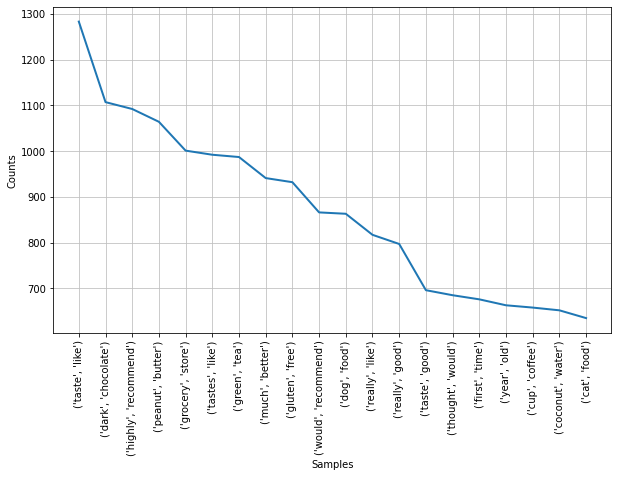

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [353]:
# Plotting the top 20 most frequent bigrams
plt.figure(figsize = (10, 6))
fd_bigrams.plot(20)

    Observations
    We have some new insights! Food items/packed items mentioned in 
    the top 20 bigrams are :
    
    a) Dark choclate 
    b) peanut butter
    c) Green tea  
    d) gluten free  
    e) dog food  
    f) coconut water 
    g) cat food 
    
    
    ie these are some of the food or services where Amazon can focus more , 
       Amazon can add more stocks with related to these item & 
       would focus more on adding more qualitative products with respect 
       to these categories to maximize revenue  ..
       
       
    Note : Since we are working on sample of data , for whole data , 
            u might end up getting more interesting results ..
    
        "Gluten free" doesn't make more sense bcz it could be either
        gluten free wheat , gluten free products , etc ..
        so lets Perform trigram analysis

#### Trigram analysis : 

In [341]:
from nltk import trigrams

In [342]:
# Generating trigrams from the reviews
trigrams = trigrams(total_text_clean_1D)

In [343]:
## takes 10-20 sec 
fd_trigrams = FreqDist()

for trigram in trigrams:
    fd_trigrams[trigram] += 1

In [344]:
fd_trigrams.most_common(5)

[(('local', 'grocery', 'store'), 251),
 (('would', 'highly', 'recommend'), 185),
 (('high', 'fructose', 'corn'), 146),
 (('fructose', 'corn', 'syrup'), 134),
 (('thought', 'would', 'give'), 132)]

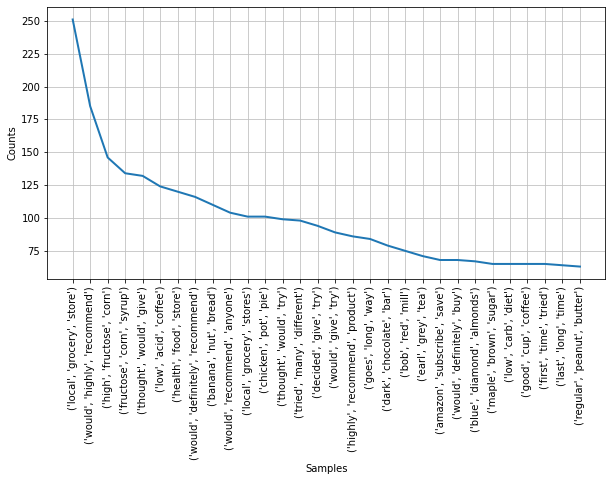

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [355]:
plt.figure(figsize = (10, 5))
fd_trigrams.plot(30)

In [354]:
fd_trigrams.most_common(30)

[(('local', 'grocery', 'store'), 251),
 (('would', 'highly', 'recommend'), 185),
 (('high', 'fructose', 'corn'), 146),
 (('fructose', 'corn', 'syrup'), 134),
 (('thought', 'would', 'give'), 132),
 (('low', 'acid', 'coffee'), 124),
 (('health', 'food', 'store'), 120),
 (('would', 'definitely', 'recommend'), 116),
 (('banana', 'nut', 'bread'), 110),
 (('would', 'recommend', 'anyone'), 104),
 (('local', 'grocery', 'stores'), 101),
 (('chicken', 'pot', 'pie'), 101),
 (('thought', 'would', 'try'), 99),
 (('tried', 'many', 'different'), 98),
 (('decided', 'give', 'try'), 94),
 (('would', 'give', 'try'), 89),
 (('highly', 'recommend', 'product'), 86),
 (('goes', 'long', 'way'), 84),
 (('dark', 'chocolate', 'bar'), 79),
 (('bob', 'red', 'mill'), 75),
 (('earl', 'grey', 'tea'), 71),
 (('amazon', 'subscribe', 'save'), 68),
 (('would', 'definitely', 'buy'), 68),
 (('blue', 'diamond', 'almonds'), 67),
 (('maple', 'brown', 'sugar'), 65),
 (('low', 'carb', 'diet'), 65),
 (('good', 'cup', 'coffee'), 

    Observations : 
    With respect to Trigram ,  famous trigrams are :
    
    a) fructose corn syrup (sweetener derived from corn syrup, 
        which is processed from corn)
    b) Dark choclate bar 
    c) maple brown sugar (healthier alternative to other sweeteners) , 
    d) regular peanut butter 
    e) blue diamond almonds (category of almonds)
    
    f) 'amazon', 'subscribe', 'save' ie lot of users are utilizing 
        "Subscribe & Save" feature of Amazon which results in more 
        discount to users !
    
    ie these are some of the food or services where Amazon can focus more , 
       Amazon can add more stocks with related to these item & 
       would focus more on adding more qualitative products with 
       respect to these categories  ..
        
    Note : Since we are working on sample of data , for whole data , 
            u might end up getting more interesting results ..